In [1]:
import sys
sys.path.append('..')
from src.unet3d.data_loader import SeismicData, SegyData
from src.unet3d.picker import FaultsPicker  
import matplotlib.pyplot as plt
import numpy as np
import torch

/home/harzad/anaconda3/envs/faults/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
root_dir = '/home/harzad/projects/faults-handler' # specify root path to repo

## Test on synthetic data

In [3]:
seismic_data_loader = SeismicData(use_osv=True)
seismic_path = '../data/validation/seis/2.dat'
fault_path = '../data/validation/fault/2.dat'
seismic_data, fault_data = seismic_data_loader.load_dat(seismic_path, fault_path)


picker = FaultsPicker(use_osv=True)
picker.load_osv_model(depth=4, model_path='../model/best_model.pth')
pred, osv, osv_thin = picker.predict_osv(seismic_data, root_dir=root_dir)

Running OSV...
Run Completed


/home/harzad/projects/faults-handler/notebook/../src/unet3d/picker.py:283: RuntimeWarning: overflow encountered in exp
  prediction = 1 / (1 + np.exp(-prediction))


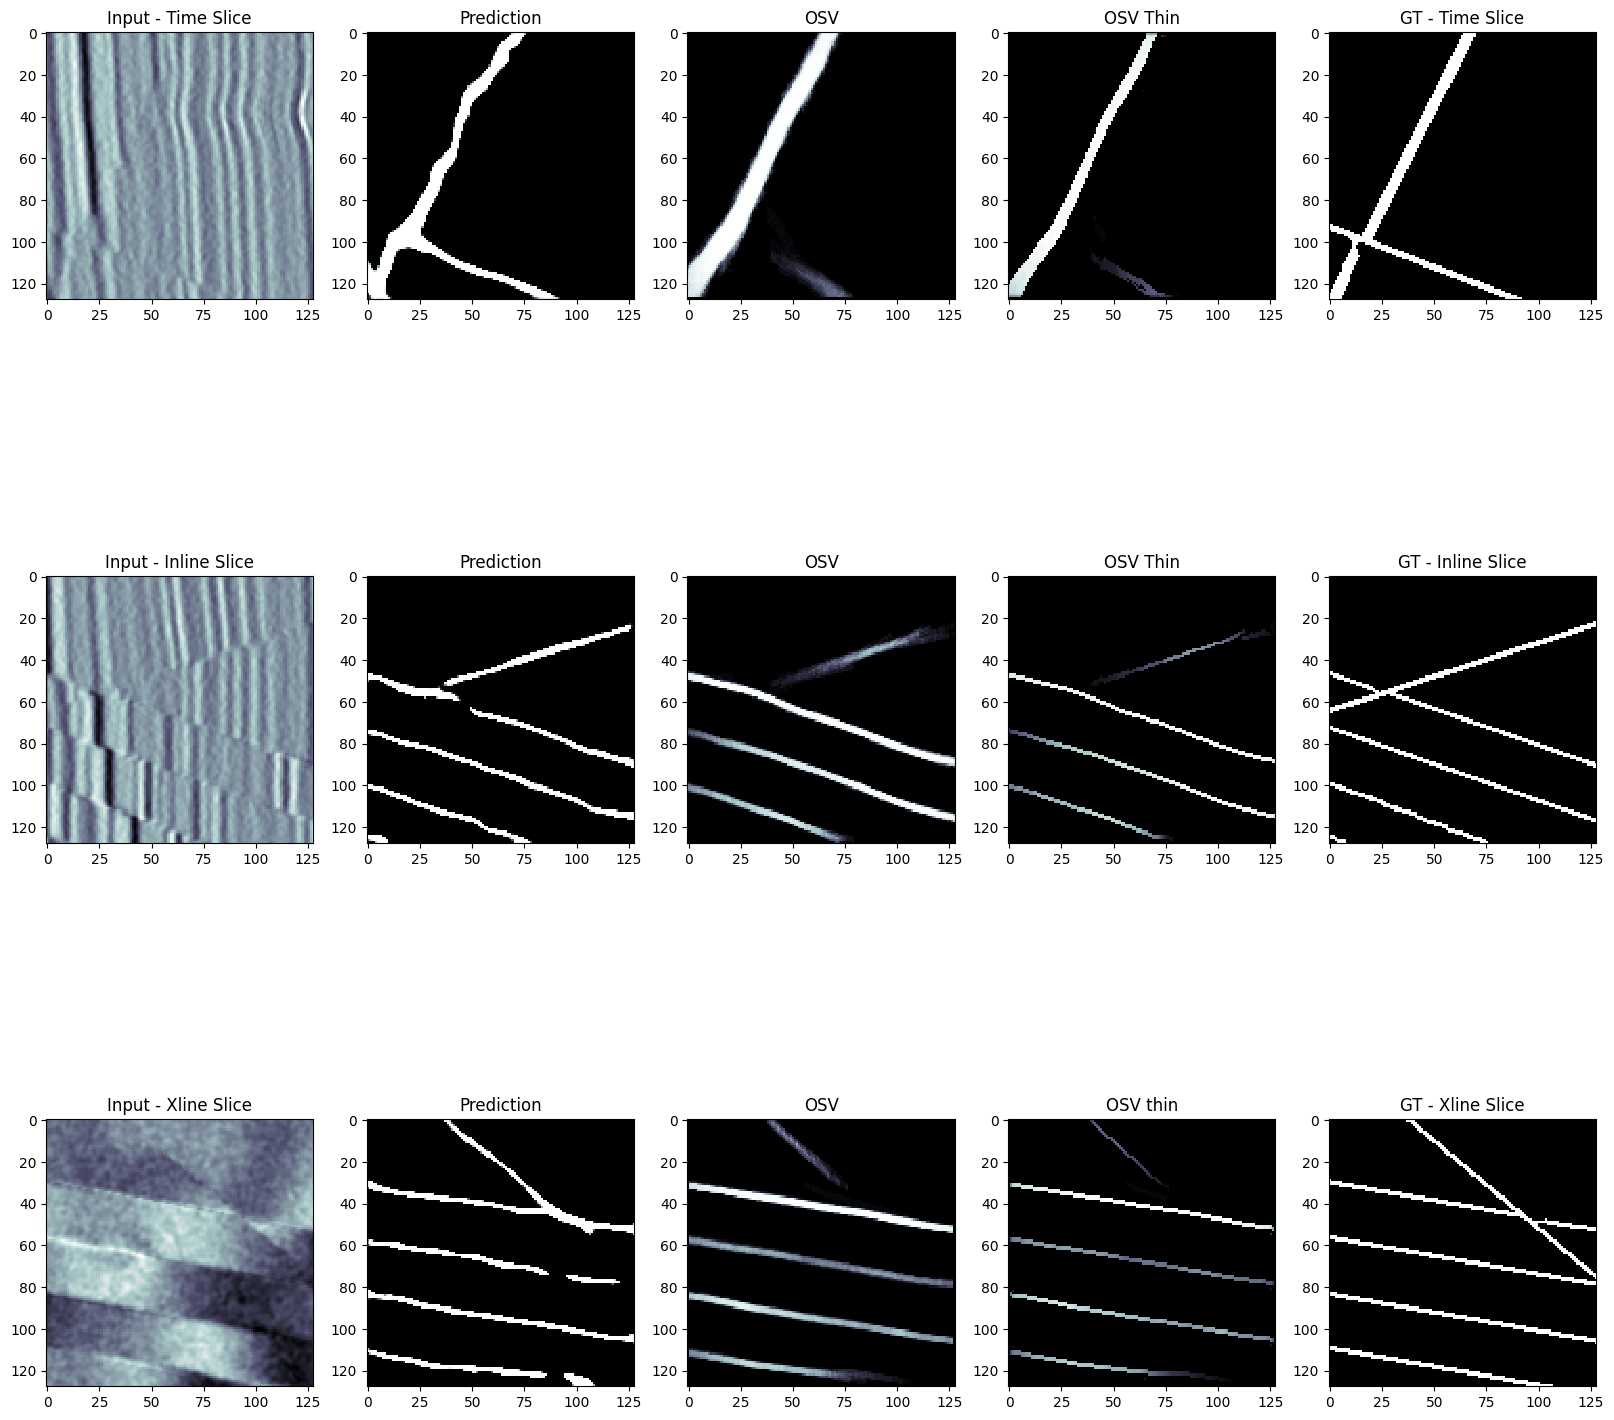

In [4]:
# Plotting
fig = plt.figure(figsize=(20, 20))
seismic_data = seismic_data.squeeze().squeeze()
fault_data = fault_data.squeeze().squeeze()

# Time slice
k1 = 50
plt.subplot(3, 5, 1)
plt.imshow(seismic_data[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Input - Time Slice")
plt.subplot(3, 5, 2)
plt.imshow(pred[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Prediction")
plt.subplot(3, 5, 3)
plt.imshow(osv[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV")
plt.subplot(3, 5, 4)
plt.imshow(osv_thin[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV Thin")
plt.subplot(3, 5, 5)
plt.imshow(fault_data[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("GT - Time Slice")

# Inline slice
k2 = 110
plt.subplot(3, 5, 6)
plt.imshow(seismic_data[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Input - Inline Slice")
plt.subplot(3, 5, 7)
plt.imshow(pred[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Prediction")
plt.subplot(3, 5, 8)
plt.imshow(osv[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV")
plt.subplot(3, 5, 9)
plt.imshow(osv_thin[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV Thin")
plt.subplot(3, 5, 10)
plt.imshow(fault_data[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("GT - Inline Slice")

# Xline slice
k3 = 10
plt.subplot(3, 5, 11)
plt.imshow(seismic_data[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Input - Xline Slice")
plt.subplot(3, 5, 12)
plt.imshow(pred[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Prediction")
plt.subplot(3, 5, 13)
plt.imshow(osv[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV")
plt.subplot(3, 5, 14)
plt.imshow(osv_thin[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV thin")
plt.subplot(3, 5, 15)
plt.imshow(fault_data[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("GT - Xline Slice")

plt.show()

## Test U-Net + OSV on SEGY

In [ ]:
segy_path = '../data/f3_dataset.sgy'
segy_data = seismic_data_loader.load_segy(segy_path)

Loaded 600515 traces into a 651x951x462 NumPy array.


In [11]:
picker = FaultsPicker(use_osv=True)
picker.load_osv_model(depth=4, model_path='../model/best_model.pth')
segy_index = 0
seismic_data = segy_data[segy_index]
prediction_segy, osv_segy, osv_thin_segy  = picker.predict_osv(seismic_data, root_dir=root_dir)

Running OSV...
Run Completed


FileNotFoundError: [Errno 2] No such file or directory: '/home/harzad/projects/faults-handler/data/prediction/fv.dat'

In [ ]:
# Plotting
fig = plt.figure(figsize=(20, 20))
seismic_data = seismic_data.squeeze().squeeze()

# Time slice
k1 = 50
plt.subplot(3, 4, 1)
plt.imshow(seismic_data[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Input - Time Slice")
plt.subplot(3, 4, 2)
plt.imshow(prediction[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Prediction")
plt.subplot(3, 4, 3)
plt.imshow(osv[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV")
plt.subplot(3, 4, 4)
plt.imshow(osv_thin[k1, :, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV Thin")

# Inline slice
k2 = 110
plt.subplot(3, 4, 5)
plt.imshow(seismic_data[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Input - Inline Slice")
plt.subplot(3, 4, 6)
plt.imshow(prediction[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Prediction")
plt.subplot(3, 4, 7)
plt.imshow(osv[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV")
plt.subplot(3, 4, 8)
plt.imshow(osv_thin[:, k2, :], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV Thin")

# Xline slice
k3 = 10
plt.subplot(3, 4, 9)
plt.imshow(seismic_data[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Input - Xline Slice")
plt.subplot(3, 4, 10)
plt.imshow(prediction[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("Prediction")
plt.subplot(3, 4, 11)
plt.imshow(osv[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV")
plt.subplot(3, 4, 12)
plt.imshow(osv_thin[:, :, k3], cmap=plt.cm.bone, interpolation="nearest", aspect=1)
plt.title("OSV thin")

plt.show()

In [ ]:
prediction_list = []
osv_list = []
osv_thin_list = []
for segy_index in range(len(segy_data)):
    seismic_data = segy_data[segy_index]
    prediction, osv, osv_thin  = picker.predict_osv(seismic_data, root_dir=root_dir)
    prediction_list.append(prediction)
    osv_list.append(osv)
    osv_thin_list.append(osv_thin)

In [ ]:
import numpy as np
import segyio

def combine_patches_to_volume(patch_list, original_shape, patch_size=(128, 128, 128)):
    """
    Combine patches back into a single 3D volume.
    
    Args:
        patch_list: List of 3D patches
        original_shape: Original shape of the full volume (n0, n1, n2)
        patch_size: Size of each patch (p0, p1, p2)
    
    Returns:
        3D numpy array of the reconstructed volume
    """
    p0, p1, p2 = patch_size
    n0, n1, n2 = original_shape
    
    # Initialize the output volume
    volume = np.zeros(original_shape, dtype=np.float32)
    
    patch_idx = 0
    # Iterate through the same pattern used to create patches
    for i in range(0, n0, p0):
        if i + p0 > n0:
            continue
        for j in range(0, n1, p1):
            if j + p1 > n1:
                continue
            for k in range(0, n2, p2):
                if k + p2 > n2:
                    continue
                
                # Place the patch back into the volume
                if patch_idx < len(patch_list):
                    volume[i:i+p0, j:j+p1, k:k+p2] = patch_list[patch_idx]
                    patch_idx += 1
    
    return volume

def save_volume_as_segy(volume, output_path, template_segy_path):
    """
    Save a 3D volume as a SEGY file.
    
    Args:
        volume: 3D numpy array (inlines, crosslines, samples)
        output_path: Path for the output SEGY file
        template_segy_path: template SEGY file to copy headers from
    """
    n_inlines, n_crosslines, n_samples = volume.shape
    n_traces = n_inlines * n_crosslines
    
    # Create specification object
    spec = segyio.spec()
    spec.sorting = segyio.TraceSortingFormat.INLINE_SORTING
    spec.format = 1  # IEEE float format
    spec.tracecount = n_traces
    spec.samples = range(n_samples)
    spec.ilines = range(1, n_inlines + 1)
    spec.xlines = range(1, n_crosslines + 1)
    
    # Use existing SEGY file as template for binary header
    with segyio.open(template_segy_path, "r", ignore_geometry=True) as template:
        with segyio.create(output_path, spec) as f:
            
            # Copy binary header from template and update necessary fields
            f.bin = template.bin
            f.bin[segyio.BinField.Samples] = n_samples
            f.bin[segyio.BinField.Traces] = n_traces
            
            # Write traces
            for i in range(n_inlines):
                for j in range(n_crosslines):
                    trace_idx = i * n_crosslines + j
                    f.trace[trace_idx] = volume[i, j, :]
                    
                    # Set trace headers
                    f.header[trace_idx] = {
                        segyio.TraceField.INLINE_3D: i + 1,
                        segyio.TraceField.CROSSLINE_3D: j + 1,
                        segyio.TraceField.TraceNumber: trace_idx + 1
                    }

# Get the original seismic array shape
original_seismic_shape = (1411, 256, 1334)

# Combine patches back into full volumes
print("Combining patches back to volumes...")
osv_volume = combine_patches_to_volume(osv_list, original_seismic_shape)
osv_thin_volume = combine_patches_to_volume(osv_thin_list, original_seismic_shape)
prediction_volume = combine_patches_to_volume(prediction_list, original_seismic_shape)

print(f"OSV volume shape: {osv_volume.shape}")
print(f"OSV thin volume shape: {osv_thin_volume.shape}")
print(f"Prediction volume shape: {prediction_volume.shape}")

# Create outputs directory if it doesn't exist
import os
os.makedirs('../data/outputs', exist_ok=True)

print("Saving OSV volume...")
save_volume_as_segy(osv_volume, '../outputs/osv_output.sgy', segy_path)
print("Saving OSV thin volume...")
save_volume_as_segy(osv_thin_volume, '../outputs/osv_thin_output.sgy', segy_path)
print("Saving prediction volume...")
save_volume_as_segy(prediction_volume, '../outputs/prediction_output.sgy', segy_path)

print("SEGY files saved successfully!")